In [4]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
X,Y = make_circles(n_samples=500, noise=0.02)

In [6]:
print(X.shape, Y.shape)

(500, 2) (500,)


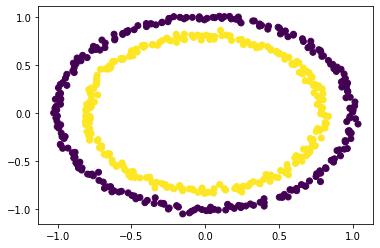

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [8]:
def phi(X):
    # applies some non linear transformation 
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0], 3))
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [9]:
X_ = phi(X)

print(X_.shape)

(500, 3)


In [10]:
print(X[:3,:], X_[:3, :])

[[-0.77823198 -0.05676071]
 [-0.85856156 -0.56925226]
 [ 0.81122039 -0.02119732]] [[-0.77823198 -0.05676071  0.60886679]
 [-0.85856156 -0.56925226  1.06117609]
 [ 0.81122039 -0.02119732  0.65852786]]


In [28]:
def plot3d(X, show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    x1 =X[:,0]
    x2 =X[:,1]
    x3 =X[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z', s=20, c=Y, depthshade=True)
    if show == True: plt.show()
    return ax

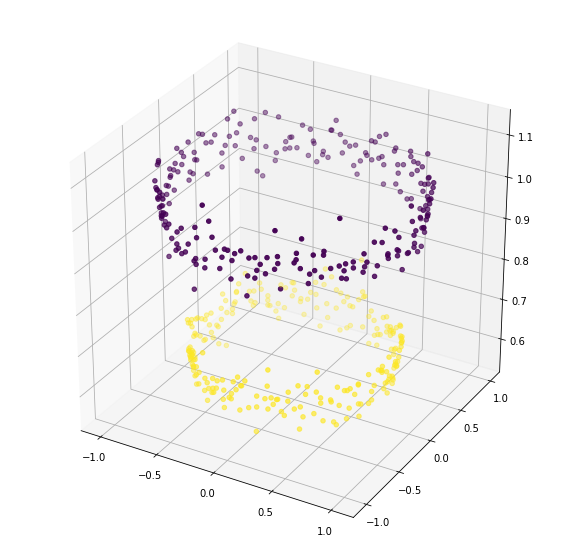

In [29]:
ax = plot3d(X_)

In [13]:
### logistic classifier

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [15]:
lr = LogisticRegression()

In [16]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print(acc)

0.454


In [17]:
## logistic classifier on higher dimension space

In [18]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print(acc)

1.0


In [19]:
### visualise the decision surface

In [20]:
lr.fit(X_, Y)

LogisticRegression()

In [24]:
wts = lr.coef_

In [25]:
bias = lr.intercept_

In [23]:
xx, yy = np.meshgrid(range(-2,2), range(-2,2))
print(xx, yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]] [[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [27]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.83069153 0.8268135  0.82293546 0.81905743]
 [0.83040806 0.82653002 0.82265199 0.81877396]
 [0.83012459 0.82624655 0.82236852 0.81849049]
 [0.82984112 0.82596308 0.82208505 0.81820701]]


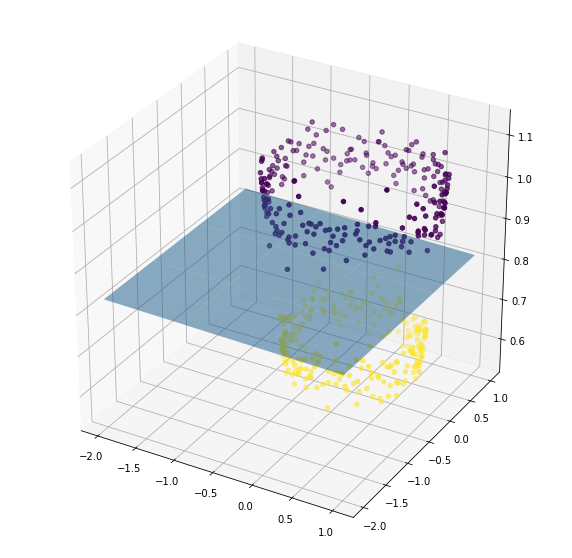

In [34]:
ax = plot3d(X_, False)
ax.plot_surface(xx,yy,z, alpha=0.5)
plt.show()

In [35]:
### kernel trick

In [36]:
from sklearn import svm

In [47]:
## linear kernel svm

In [48]:
svc = svm.SVC(kernel="linear")

In [49]:
svc.fit(X,Y)

SVC(kernel='linear')

In [50]:
svc.score(X,Y)

0.504

In [51]:
## rbf kernel svm 

In [52]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [53]:
## polynomial kernel svm

In [55]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.558

In [56]:
## custom kernel

In [61]:
def customKernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [62]:
svc = svm.SVC(kernel=customKernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0